In [1]:
import torch
import math
import matplotlib.pyplot as plt

For this example, we'll make a noisy line *y = mx + c*. Run with these first: they produce acceptable graphing results.  

In [2]:
num_points = 5
noisiness = 50

m = 2.7
c = .5

Create the X data, it's 2 dimensional.

In [3]:
x1 = torch.rand( num_points, 1 )
x2 = x1 * m + c + ( ( torch.rand( x1.size() ) - 0.5 ) * ( noisiness/100.0 ) )

X = torch.cat( (x1,x2), 1 )

Plot the data points, the red dots represent the raw 2 dimensional data. Notice how the information contained in the dots of focused close to a line. This is often the case in real data: two variables are highly correlated, pca can be thought of as 

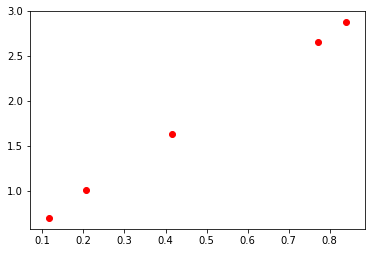

In [4]:
plt.scatter( X[:,0].tolist(), X[:,1].tolist(), color='red' ) 
plt.show()

How can we turn 2-D data into 1-D (reduce the dimensionality). We could project the data onto the X axis. These steps should do the trick...

- rotate the graph to make the best fit line horizontal (pink points)
- set the Y co-ordinate of the rotated points equal zero (grey points)

In this example we'll shortcut the best fit calc: we know m, so we can rotate by the line slope.

Take a look at what we did in the graph below. We projected the red dots onto the x-axis. We lost some information, the y-axis value of the rotated data. 

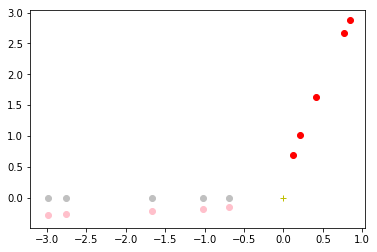

In [5]:
a = -math.acos( -1.0/m )

ca = math.cos( a )
sa = math.sin( a )
rotation = torch.tensor( [  [ca, -sa], [sa, ca ] ] )

XRot = X.mm( rotation ) 

plt.plot( [0],[0], 'y+' ) 
plt.scatter( X[:,0].tolist(), X[:,1].tolist(), color='red' ) 
plt.scatter( XRot[:,0].tolist(), XRot[:,1].tolist(), color='pink' ) 
YP = torch.zeros( XRot.size( 0 ) )
plt.scatter( XRot[:,0].tolist(), YP, color='silver' ) 
plt.show()

This is a generic way of doing this, in multiple dimensions: all at once.
The principal components analysis (PCA) algorithm performs all the rotations in one step.

The PCA steps are
 
- build the covariance matrix
- decompose the covariance matrix into the singular vectors (SVD)
- take the first n largest left singular vectors as the reduction matrix

The SVD algorithm fators an input matrix into two rotations and a scaling. 
We'll use the left singular vectors as the matrix to reduce the dimension. This factoring finds the best rotations, such that the least information is lost.

Note: the S matrix contains the eigenvalues for each rotation, sorted largest to smallest. The amount of information kept is the ratio of the S values kept to the total of S values. 

In [6]:
def pca( X, n=1 ) :
    '''
    returns a matrix to reduce the dimension of the input
    to the given number of dimensions. A matrix to 'restore'
    the reduced data back to its original form also returned
    '''    
    Covariance = X.t().mm( X ) / ( X.size(0)-1.0 )
    
    U, S, V = torch.svd( Covariance )
    U1 = U[ :, 0:n]
    V1 = V[0:n,:]

    XR = X.mm( U1 )
    var_preserved = S[0:n].sum() / S.sum()
    
    print( "%4.2f%% of the variance preserved" % ( 100*var_preserved ) )
    
    return XR, V1

Plotting the data shows graphically what we did.
XR is the reduced data, in this case 2-D becomes 1-D. Plot 
- the red (raw input) 
- silver (projected to x-axis) from the previous step
- pca reduced data (blue . )

The PCA produces identical results to the rotation from the previous step: the blue dots are coincident with the silver dots.

Finally we plot the restored data, projecting the reduced dimension data to its original space. Note that the yellow and red are not 100% coincident, we did lose some information by reducing dimension. That's the price we pay for working in lower dimensions.

99.93% of the variance preserved


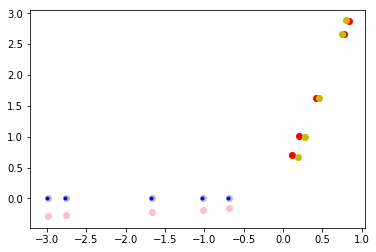

In [7]:
XR, VR = pca( X, 1 )
#XF, VF = pca( X, X.size(1) )

plt.scatter( X[:,0].tolist(), X[:,1].tolist(), color='red' ) 
plt.scatter( XRot[:,0].tolist(), XRot[:,1].tolist(), color='pink' ) 
plt.scatter( XRot[:,0].tolist(), YP.tolist(), color='silver' ) 

plt.plot( XR.tolist(), YP.tolist(), 'b.' ) 
#plt.plot( XF[:,0].tolist(), XF[:,1].tolist(), 'g+' ) 

XRestored = XR.mm( VR )
plt.plot( XRestored[:,0].tolist(), XRestored[:,1].tolist(), 'yo' ) 

plt.show()


note: it's not necessary to run the (expensive) SVD on the entire X dataset. A representative sample is acceptable. 

As an exercise, doing the same thing on truly random data means we pay more of an information loss price for reducing dimensions.
Note how far the yellow dots are from the original red dots.

93.47% of the variance preserved


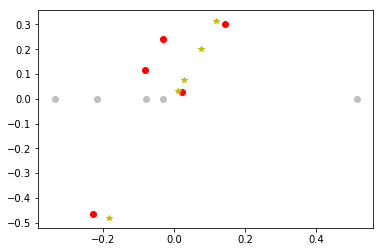

In [21]:
X = torch.rand( num_points, 2 ) - 0.5

XR,VR = pca( X, 1 )

plt.scatter( X[:,0].tolist(), X[:,1].tolist(), color='red' ) 
plt.scatter( XR.tolist(), YP, color='silver' ) 

XRestored = XR.mm( VR )
plt.plot( XRestored[:,0].tolist(), XRestored[:,1].tolist(), 'y*' ) 

plt.show()
